<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [188]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split



Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [189]:

df = pd.read_csv('data.csv')

W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [190]:
categorical = df.dtypes == 'object'


print('Dane tektowe zawierają kolumny :\n\n', categorical)


Dane tektowe zawierają kolumny :

 age               False
workclass          True
fnlwgt            False
education          True
education_num     False
marital_status     True
occupation         True
relationship       True
race               True
sex                True
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
income             True
dtype: bool


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [192]:
# workclass trzeba podmienić '?' na NaN i dropnąć
# occupation trzeba podmienić '?' na NaN i dropnąć
# native_country trzeba podmienić '?' na NaN i dropnąć
df.replace(' ?', np.nan, inplace=True)
df.dropna(inplace=True)


Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [193]:
X = df.drop('income', axis=1)
y = df[['income']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [194]:
import category_encoders as ce

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

d:\.semestr 5\aibd\laboratorium-6-dominik-air\venv\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


macierz błędu
[[6423  341]
 [1620  665]]


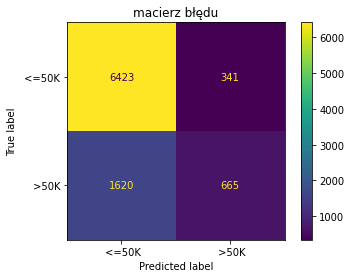

              precision    recall  f1-score   support

       <=50K       0.80      0.95      0.87      6764
        >50K       0.66      0.29      0.40      2285

    accuracy                           0.78      9049
   macro avg       0.73      0.62      0.64      9049
weighted avg       0.76      0.78      0.75      9049



In [195]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
print('macierz błędu')
print(cm)
im = ConfusionMatrixDisplay(cm, display_labels=gnb.classes_)
im.plot()
plt.title('macierz błędu')
plt.show()
print(classification_report(y_test, y_pred))

Klasyfikator Bayesowski w przypadku klasy złożonej z dwóch elementów prezentuje całkiem zadawalające wyniki dla osobników o zarobkach poniżej 50k, lecz dla grupy osób powyżej 50k można zauważyć że współczynnik recall jest dosyć niski, co świadczy o tym, że często klasyfikuje osobników >50k jako <50k.

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

In [196]:
def bayes_classifier(group: str):
    X = df.drop(group, axis=1)
    y = df[[group]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    encoder = ce.OneHotEncoder()

    X_train = encoder.fit_transform(X_train)

    X_test = encoder.transform(X_test)

    gnb = GaussianNB()

    # fit the model
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)

    cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
    df_cm = pd.DataFrame(cm, index = gnb.classes_,
                         columns = gnb.classes_)
    plt.figure(figsize=(16,16))
    sns.heatmap(df_cm, annot=True)
    plt.title('macierz błędu')
    plt.show()

    print(classification_report(y_test, y_pred, zero_division=False))

Wyniki dla kolumny race:

d:\.semestr 5\aibd\laboratorium-6-dominik-air\venv\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


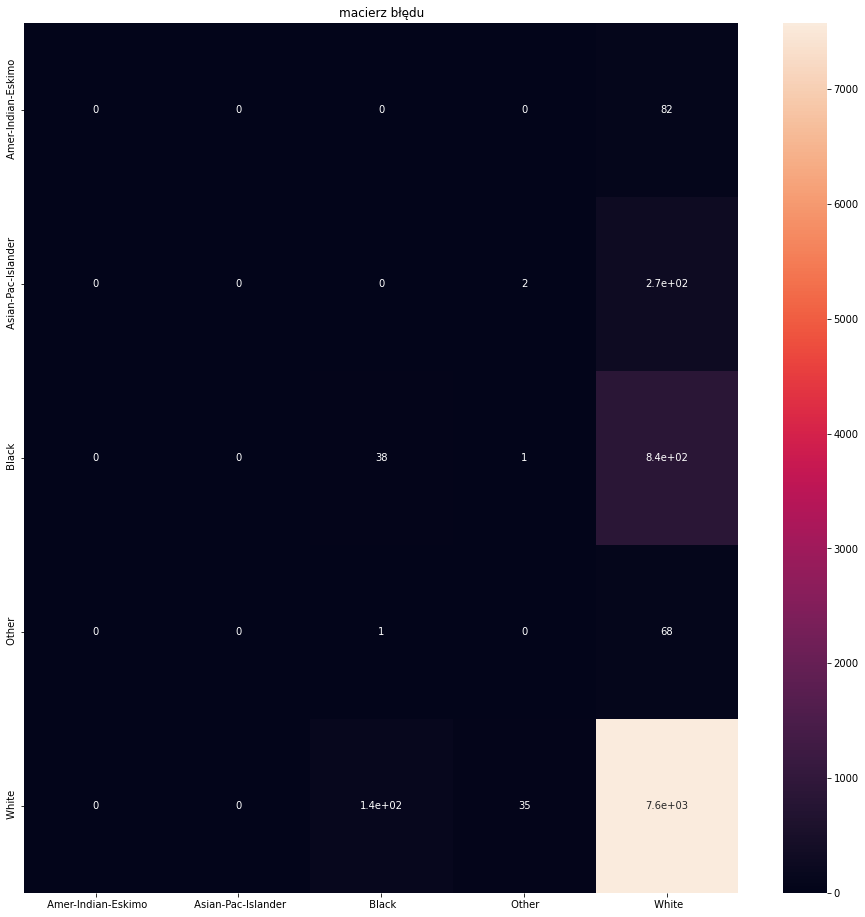

                     precision    recall  f1-score   support

 Amer-Indian-Eskimo       0.00      0.00      0.00        82
 Asian-Pac-Islander       0.00      0.00      0.00       270
              Black       0.21      0.04      0.07       878
              Other       0.00      0.00      0.00        69
              White       0.86      0.98      0.91      7750

           accuracy                           0.84      9049
          macro avg       0.21      0.20      0.20      9049
       weighted avg       0.76      0.84      0.79      9049



In [197]:
bayes_classifier('race')

Jak można zauważyć po wskaźnikach precision oraz recall to pomimo, że model ogólnie jest dokładny (accuracy ~0.84) ze względu na zdominowanie zbioru danych osobnikami rasy białej, lecz nie nadaje się do klasyfikowania osób o innej rasie.

Wyniki dla kolumny native_country:

d:\.semestr 5\aibd\laboratorium-6-dominik-air\venv\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


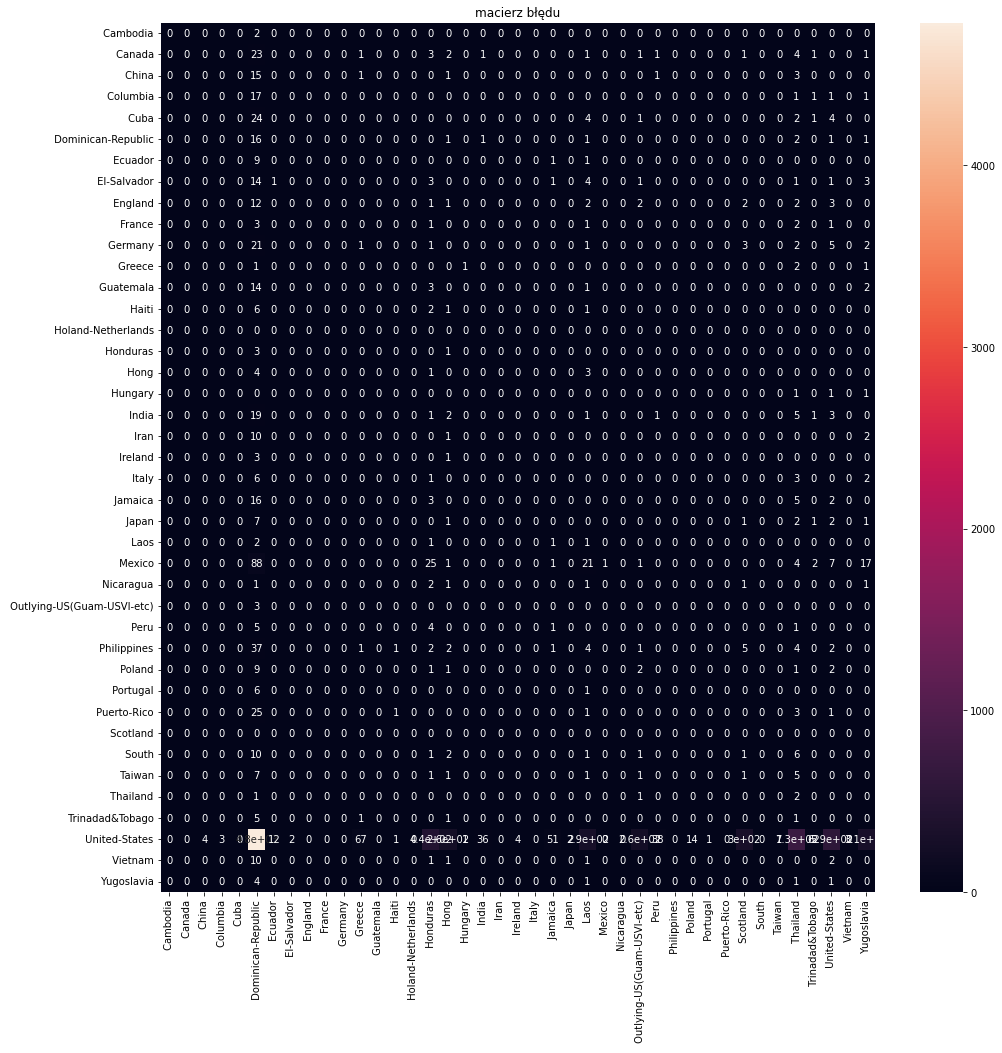

                             precision    recall  f1-score   support

                   Cambodia       0.00      0.00      0.00         2
                     Canada       0.00      0.00      0.00        40
                      China       0.00      0.00      0.00        21
                   Columbia       0.00      0.00      0.00        21
                       Cuba       0.00      0.00      0.00        36
         Dominican-Republic       0.00      0.70      0.01        23
                    Ecuador       0.00      0.00      0.00        11
                El-Salvador       0.00      0.00      0.00        29
                    England       0.00      0.00      0.00        25
                     France       0.00      0.00      0.00         8
                    Germany       0.00      0.00      0.00        36
                     Greece       0.00      0.00      0.00         5
                  Guatemala       0.00      0.00      0.00        20
                      Haiti      

In [198]:
bayes_classifier('native_country')

In [199]:
df['native_country'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

Klasyfikacja dla tak licznej klasy powoduje bardzo niedokładne rezulataty i jest wręcz gorsze niż powiedzmy takie losowe klasyfikowanie "Amerykanin" i "Nie Amerykanin", które by było skuteczne w 50% przypadków. W tym przypadku klasa native_country zdominowana jest przez osobników z Stanów Zjednoczonych i przy tak wielu klasach dokładność klasyfikatora Bayesowskiego gwałtowanie spadła(zdominowanie przez amerykanów nie ciągnie dokładności do góry jak w przypadku klasyfikacji wg klasy race).